# TERCER ENTRGA FINAL 
## Data: Car Insurance Data: https://www.kaggle.com/sagnik1511/car-insurance-data

## Alumna:

* Garrido, Corina


# Introducción: 

### *Presentación de la empresa, organización o problema específico. - Preguntas y objetivos de la investigación. - Data Acquisition - Data-storytelling - Palttear objetivos u objetivo para esos datos*

Elegimos este dataset basado en los clientes que tiene una empresa de seguros en el ramo autos, y si han realizado un reclamo de siniestro o no en el último año, ya que nos pareció interesante poder crear un algoritmo que pueda predecir si un asegurado va a realizar un reclamo en el transcurso del próximo ciclo. Como interesados en el ámbito del seguro, nos gustaría poder predecir esto y analizar cuáles son los reclamos más frecuentes, y entender cuáles podrían ser las decisiones empresariales que le ayudaría a la empresa a actuar brindando un mejor servicio, manteniendo los costos o aún mejor disminuyendolos, si se pudiera, no teniendo que pagar ciertos reclamos.

Este dataset pudimos conseguirlo en www.kaggle.com, chequeando que los datos sean correctos y equilibrados.

Ahora nos preguntaremos, ¿Es posible predecir cuántos reclamos esta empresa de seguros va a tener en el próximo año? ¿Qué pasa si estimamos mal? ¿Que pasa si al clasificar a un clinte, creemos que no va a realizar ningún reclamo, y luego si lo hace? Esto es interesante tener en cuenta para poder estimar las reservas que debe la compañía generar para no entrar en quiebra o tener más gastos de los esperados y cerrar el ejercicio con un déficit financiero. También en otro nivel de análisis nos puede ayudar a estimar el precio de la prima que debe cobrar y diferentes condiciones específicas de contratación. 




# Data Wrangling

### Descubrimiento:
Podemos ver la estructura del dataset, las diferentes columnas, una muestra de los primeros datos, la cantidad de datos y el tipo de dato de cada columna.


In [ ]:
#Empecemos importando las librerias y el dataset a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

df = pd.read_csv("C:/Users/Cori/Desktop/CURSO CODER DATA SCIENCIE/PROYECTO FINAL", sep = ",")


In [ ]:
#Veamos las primeras 5 filas
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
#Veamos las 5 ultimas filas
df.tail()

In [ ]:
#Dimension del dataset
print(df.shape)

In [ ]:
#Nombre de los atributos
df.columns

In [ ]:
#Tipo de dato para cada columna
df.dtypes

In [ ]:
#Otra manera también de obtener la misma información, hubiese sido calcular la totalidad de registros por columnas
df.count()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [ ]:
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

### Limpieza de datos

#### Vamos a llenar los valores missing con el promedio de la columna.- y luego corroboramos que no nos queda ningún valor null.-

In [ ]:
#Vamos a llenar los valores missing con el promedio de la columna.- y luego corroboramos que no nos queda ningún valor null.-
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

### Estructuración:

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file("report.html")

### Enrriquecimiento:


In [ ]:
#Utilicemos la funcion round para visualizar mejor nuestros datos
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,500522.0,290031.0,101.0,249638.0,501777.0,753974.0,999976.0
CREDIT_SCORE,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
VEHICLE_OWNERSHIP,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
MARRIED,10000.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
CHILDREN,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
POSTAL_CODE,10000.0,19865.0,18916.0,10238.0,10238.0,10238.0,32765.0,92101.0
ANNUAL_MILEAGE,10000.0,11697.0,2680.0,2000.0,10000.0,11697.0,13000.0,22000.0
SPEEDING_VIOLATIONS,10000.0,1.0,2.0,0.0,0.0,0.0,2.0,22.0
DUIS,10000.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
PAST_ACCIDENTS,10000.0,1.0,2.0,0.0,0.0,0.0,2.0,15.0


In [ ]:
#Al contar con diferentes variables de tipo string se decide transformar a valor numérico, 
#además de que se dorpea el primer atributo que es el ID del dataset y esto puede agregar errores a mi modelo ya que es un valor único para cada registro.
data_insurance = pd.get_dummies(df)
data_insurance = data_insurance.drop("ID", axis=1)
data_insurance

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,0.629027,1.0,0.0,1.0,10238,12000.000000,0,0,0,0.0,...,0,0,0,0,1,0,1,0,1,0
1,0.357757,0.0,0.0,0.0,10238,16000.000000,0,0,0,1.0,...,1,0,0,1,0,0,0,1,1,0
2,0.493146,1.0,0.0,0.0,10238,11000.000000,0,0,0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,0.206013,1.0,0.0,1.0,32765,11000.000000,0,0,0,0.0,...,0,1,0,0,0,1,0,1,1,0
4,0.388366,1.0,0.0,0.0,32765,12000.000000,2,0,1,1.0,...,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.582787,1.0,0.0,0.0,10238,16000.000000,0,0,1,0.0,...,0,1,0,0,1,0,0,1,1,0
9996,0.522231,1.0,0.0,1.0,32765,11697.003207,1,0,0,0.0,...,1,0,1,0,0,0,1,0,1,0
9997,0.470940,1.0,0.0,1.0,10238,14000.000000,0,0,0,0.0,...,0,0,1,0,0,0,0,1,1,0
9998,0.364185,0.0,0.0,1.0,10238,13000.000000,2,0,1,1.0,...,0,0,0,1,0,0,0,1,1,0


#### Podemos ver que el promedio de cada columna, por ejemplo el de annual_mileage )kilometraje que hace por año cada auto) tiene un promedio de 11697 km.- Luego podemos ver cual es el valor mínimo de cada columna (solo de las que son int o float, es decir numéricas), sabemos que mínimo no se refiere al más chico ya que podemos llegar a tener outliers inferiores, sino que es el que Q3 + 1.5 por el rango intercuartílico.- Despúes nos muestra donde estan los Q1 (25% de los datos), Q2 (50% de los datos que es igual a la mediana) y Q3 (75% de los datos).

# EDA

## Análisis univariado
Podemos ver en el gráfico 1 que, en esta base de datos, las personas de clase alta son las que mas contratos tienen con la compañía, mientras que las personas de clase trabajadora son los que menos contratan este servicio. Acá podemos deducir que este servicio de seguros es mas caro que otros, pero está en la compañía ver si su decisión es ser competitivos o exclusivos. En el gráfico 2, corroboramos que por suerte, la mayoría no suele tener violaciones a la velocidad, pero que siempre están los que infligen la ley. Por otro lado, el gráfico 3 nos muestra algo parecido, pero con los accidentes pasados, la mayoría no tuvo accidentes anteriores, pero sí hubo varios que tuvieron que pasar por eso.
El gráfico 4 nos muestra que el Credit score tiene una distribución normal, con una leve asimetría hacia la izquierda. 
En el gráfico 5 podemos ver el kilometraje anual que tienen los autos asegurados en esta compañía, y podemos ver que también sigue una distribución normal con una media de 11697. Pero el boxplot del gráfico 6 nos muestra que esta misma variable tiene outliers tanto superiores como inferiores. Y vemos que credit Score también los tiene en el gráfico 7.
Por último los gráficos 8 y 9 nos muestran que los que más contratan este seguro son personas entre 26 y 39 años, aunque los de 40 a 64 son apenas unos pocos menos; y tienen una educación secundaria o universitaria, sin educación son los menos. 


<AxesSubplot:xlabel='INCOME', ylabel='count'>

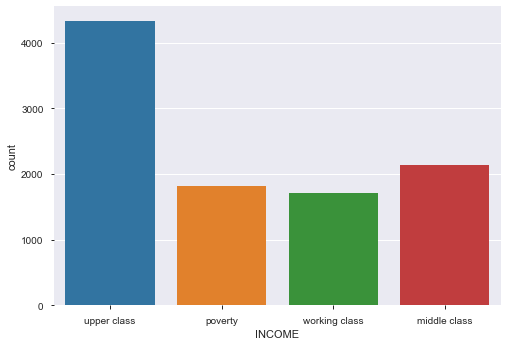

In [ ]:
#Grafico 1 - analisis univariado 
sns.countplot(x=df['INCOME'])

<AxesSubplot:xlabel='SPEEDING_VIOLATIONS', ylabel='count'>

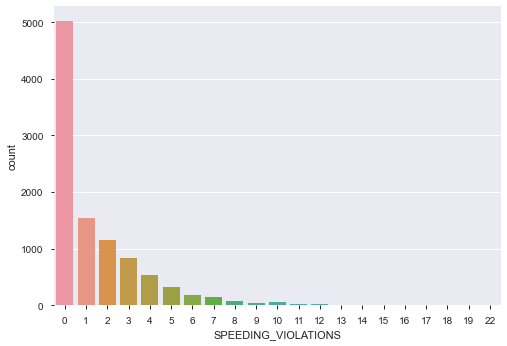

In [ ]:
#Grafico 2 - análisis univariado 
from seaborn import distplot
sns.countplot(df.SPEEDING_VIOLATIONS,)

<AxesSubplot:xlabel='PAST_ACCIDENTS', ylabel='count'>

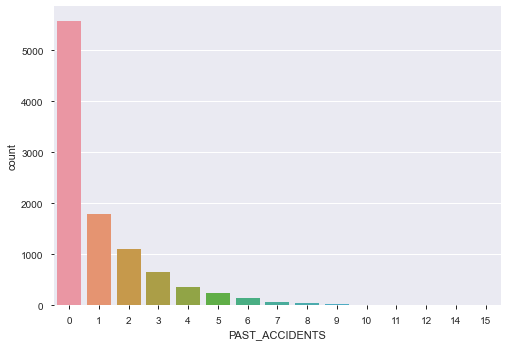

In [ ]:
#grafico 3 - analisis univariado
from seaborn import boxplot
sns.countplot(x=df.PAST_ACCIDENTS)

Estadísticas descriptivas

<AxesSubplot:xlabel='CREDIT_SCORE', ylabel='Density'>

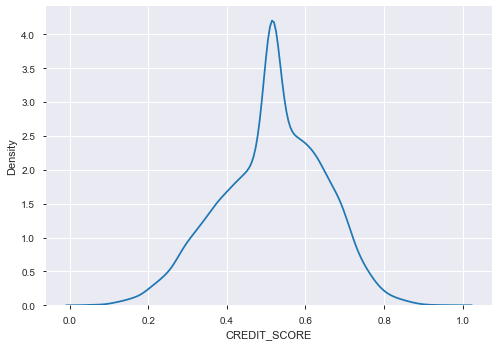

In [ ]:
#Grafico 4 - análisis univariado
from seaborn import distplot
distplot(df.CREDIT_SCORE, hist=False)

<AxesSubplot:xlabel='ANNUAL_MILEAGE', ylabel='Density'>

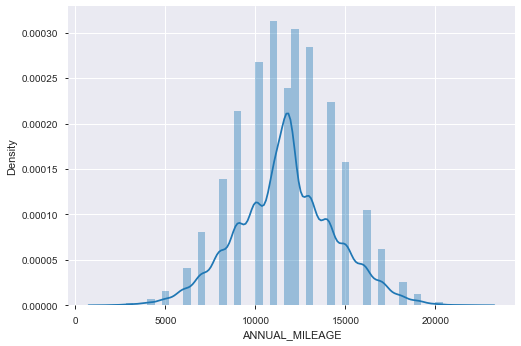

In [ ]:
#grafico 5 - análisis univariado
distplot(df["ANNUAL_MILEAGE"])

In [ ]:
np.mean(df.ANNUAL_MILEAGE)

11697.00320690015

<AxesSubplot:ylabel='ANNUAL_MILEAGE'>

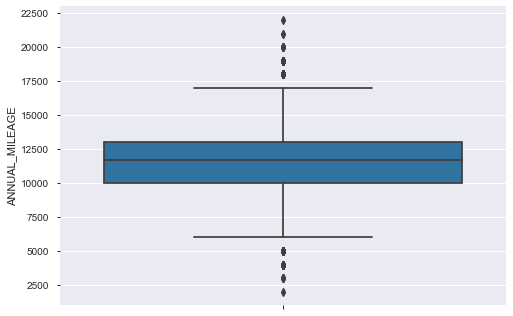

In [ ]:
#grafico 6 - análisis univariado
boxplot(y=df.ANNUAL_MILEAGE, orient="v")

<AxesSubplot:ylabel='CREDIT_SCORE'>

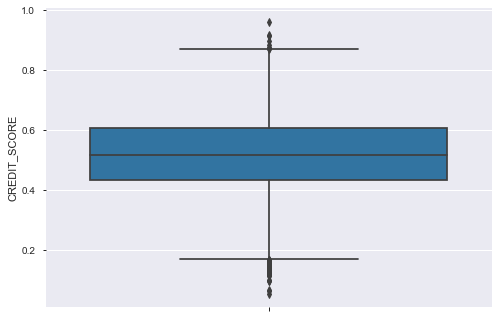

In [ ]:
#grafico 7- análisis univariado 
boxplot(y=df.CREDIT_SCORE)

<AxesSubplot:>

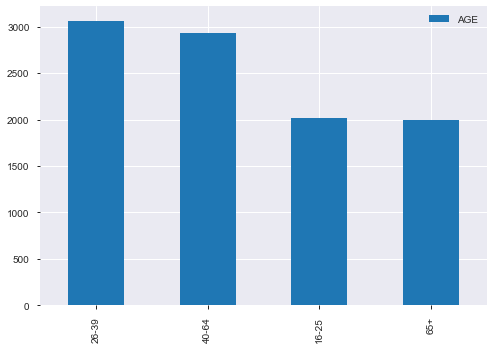

In [ ]:
#grafico 8 - análisis univariado
frec_df = pd.DataFrame(df["AGE"].value_counts())
frec_df.head(10).plot.bar()

<AxesSubplot:>

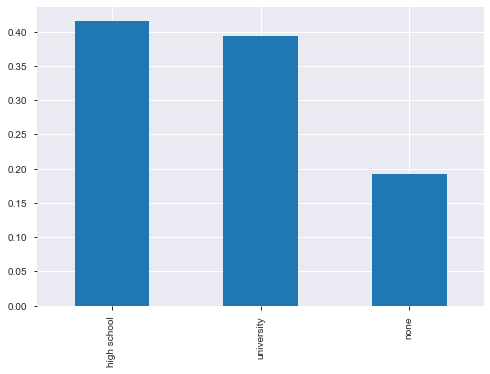

In [ ]:
#grafico 9 - análisis univariado
(df['EDUCATION'].value_counts().head(10) / len(df)).plot.bar()

## Análisis bivariado
Primero hacemos un gráfico de correlaciones para poder ver más intuitivamente las relaciones entre las variables. Sabemos que cuanto más se acerque la correlación a 1 , en valor absoluto, es más fuerte. 
En el primer gráfico de boxenplot se puede visualizar que a partir de los 10 años de experiencia los conductores aumentan la cantidad de accidentes considerablemente y luego continúa aumentando.
El siguiente gráfico es representación de la relación de accidentes pasados y el año del vehículo. Lo que se puede visualizar es que la distribución es mayor para autos posteriores al 2015, que presenta una mediana de 1 accidente pasado para autos con año posterior al 2015. También podemos ver que la distribución para los autos anteriores al 2015 es más concentrada, y aunque ambas presentan varios outliers, los anteriores al 2015 tienen más cantidad. Vemos que mientras el máximo para autos anteriores al 2015 es de 2 siniestros anteriores, para los autos posteriores al 2015 el máximo es de 5 accidentes pasados.
Podemos ver que claramente los universitarios tuvieron una mayor cantidad de siniestros pasados, mientras que los que no tienen educación son más cuidadosos al manejar, pero para esto tenemos que tener en cuenta lo que comentabamos en el análisis univariado, que también son más los universitarios que contratan este seguro, que los que no tienen educación.  
Y  por último, en los dos gráficos siguientes, podemos ver que los hombres son quienes tuvieron más accidentes 


In [ ]:
#analisis de correlación 
correlation = df.corr(method="pearson")

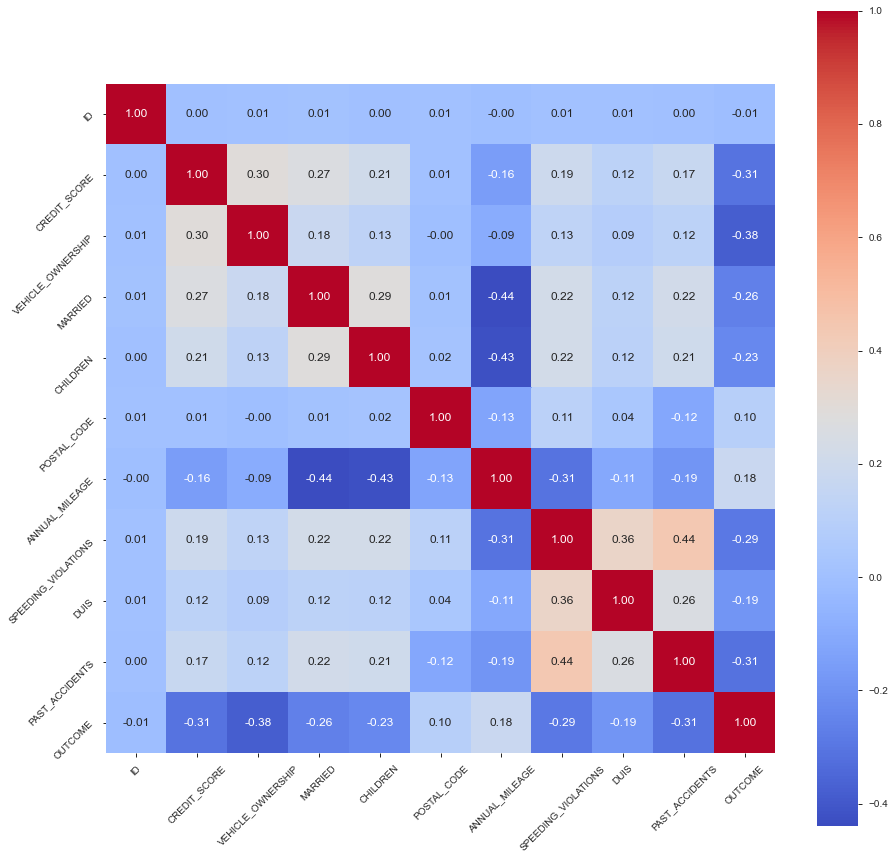

In [ ]:
#Resulta más intuitivo ver la matriz de correlación a través de un gráfico - heatmap de seaborn

plt.figure(figsize=(15,15)) #Defino el tamaño del grafico

#Genero el mapa de calor
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 12},
            cmap= 'coolwarm') 

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
pd.crosstab(df.PAST_ACCIDENTS, df.DRIVING_EXPERIENCE)

DRIVING_EXPERIENCE,0-9y,10-19y,20-29y,30y+
PAST_ACCIDENTS,,,,
0,3530,1431,485,138
1,0,1049,553,181
2,0,506,416,182
3,0,197,277,172
4,0,78,165,123
5,0,27,111,94
6,0,10,66,68
7,0,1,33,27
8,0,0,9,32


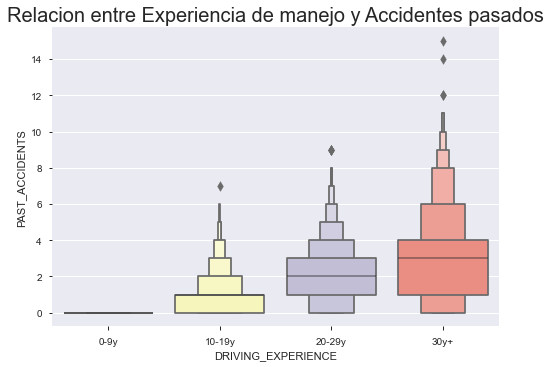

In [ ]:
sns.boxenplot(x=df['DRIVING_EXPERIENCE'], y=df['PAST_ACCIDENTS'], palette = 'Set3')
plt.title('Relacion entre Experiencia de manejo y Accidentes pasados', fontsize = 20, fontweight = 30)
plt.show()

In [ ]:
pd.crosstab(df.PAST_ACCIDENTS, df.VEHICLE_YEAR)

VEHICLE_YEAR,after 2015,before 2015
PAST_ACCIDENTS,,
0,1429,4155
1,659,1124
2,374,730
3,234,412
4,126,240
5,83,149
6,59,85
7,30,31
8,19,22


In [ ]:
df.groupby('VEHICLE_YEAR')['PAST_ACCIDENTS'].describe()

,count,mean,std,min,25%,50%,75%,max
VEHICLE_YEAR,,,,,,,,
after 2015,3033.0,1.300692,1.824396,0.0,0.0,1.0,2.0,15.0
before 2015,6967.0,0.949907,1.559957,0.0,0.0,0.0,1.0,14.0


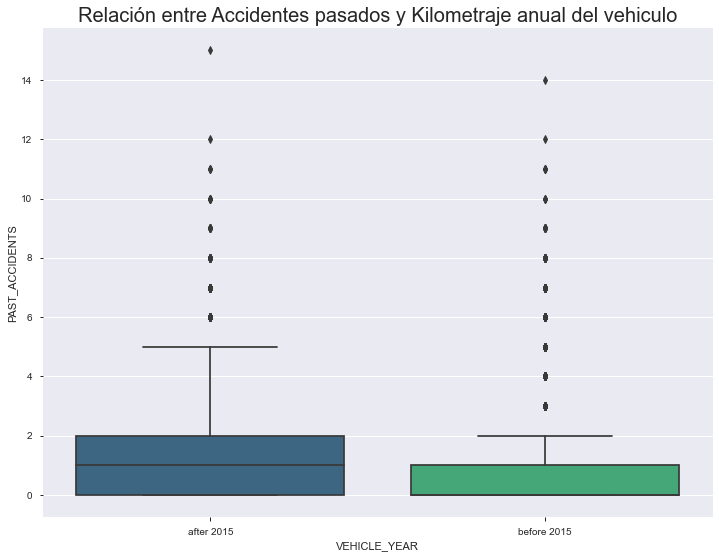

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x=df['VEHICLE_YEAR'], y=df['PAST_ACCIDENTS'], palette = 'viridis')
plt.title('Relación entre Accidentes pasados y Kilometraje anual del vehiculo', fontsize = 20)
plt.show()

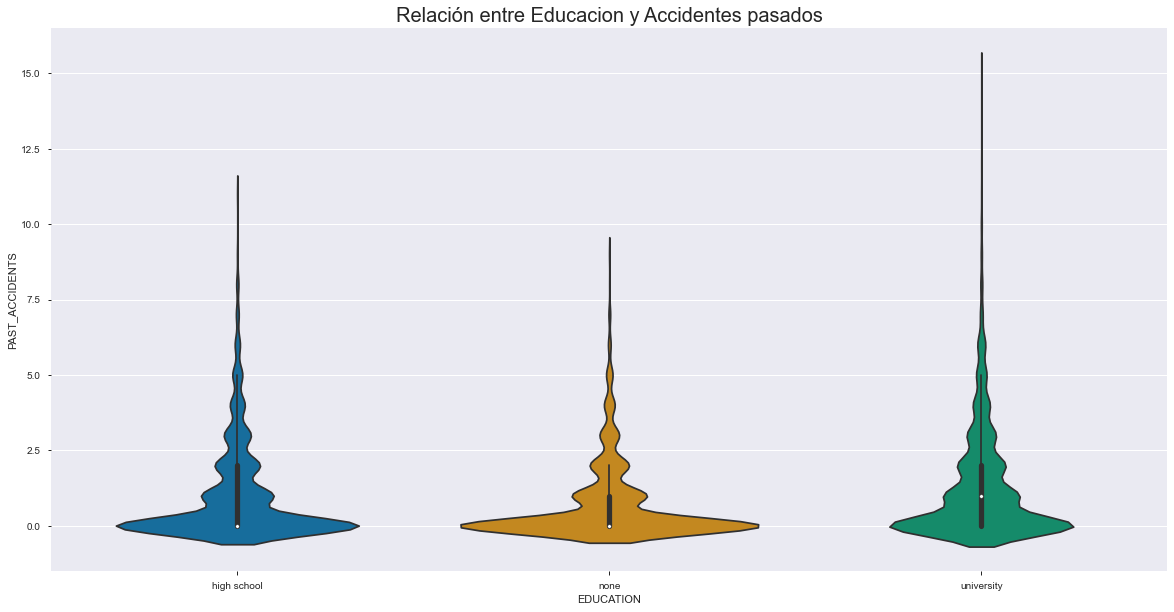

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
sns.violinplot(x=df['EDUCATION'], y=df['PAST_ACCIDENTS'], palette = 'colorblind')
plt.title('Relación entre Educacion y Accidentes pasados', fontsize = 20, fontweight = 30)
plt.show()

<AxesSubplot:xlabel='PAST_ACCIDENTS', ylabel='count'>

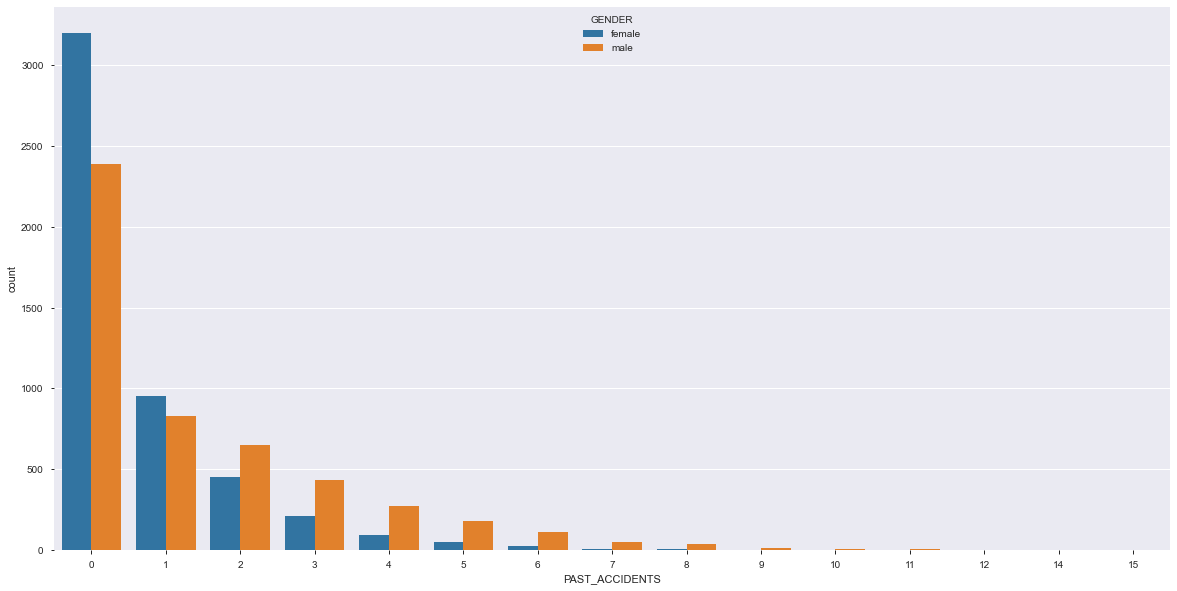

In [ ]:
sns.countplot(data=df, x=df.PAST_ACCIDENTS , hue='GENDER')

<AxesSubplot:xlabel='OUTCOME', ylabel='count'>

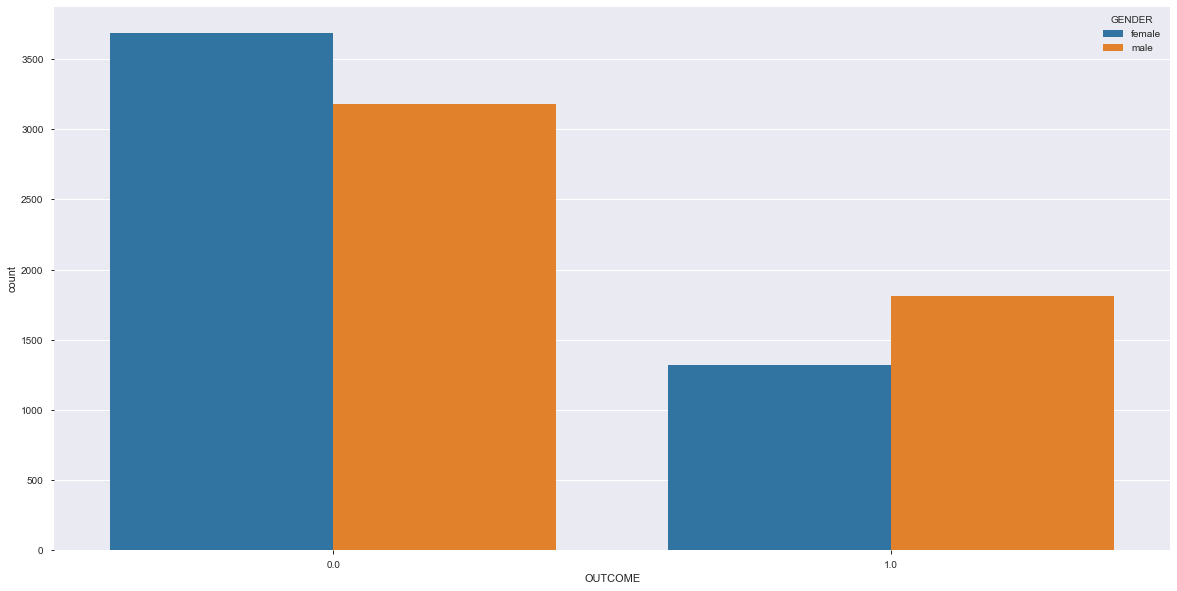

In [ ]:
sns.countplot(data=df, x=df.OUTCOME , hue='GENDER')

Teniendo en cuenta que el OUTCOME son los reclamos que se hicieron en el ultimo año (0.0 es que no reclamo, 1.0 es que hizo un reclamo por siniestro este año), podemos ver que continúa con lo dicho antriormente, que los hombres tienen mas siniestros que las mujeres.

## Análisis multivariado

Join plot de Annual Mileage con otras variables ==> 

Correlacion entre Past Accidents y SPEEDING_VIOLATIONS ==>  -0.3081251511816336


<Figure size 500x400 with 0 Axes>

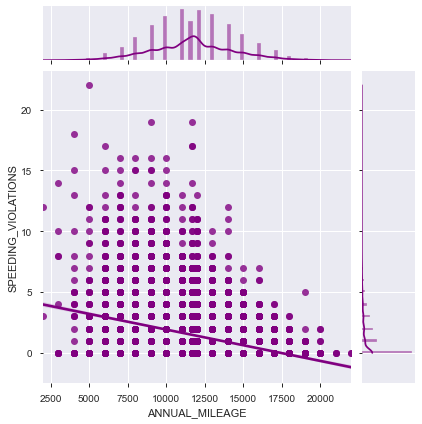

Correlacion entre Past Accidents y DUIS ==>  -0.11123216437821375


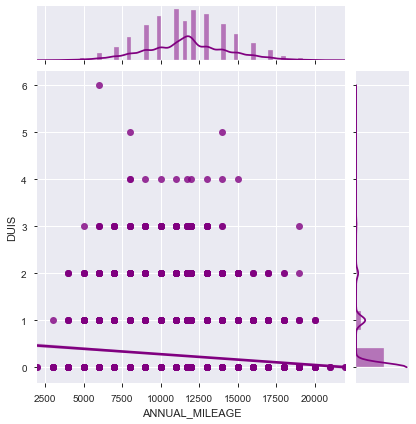

Correlacion entre Past Accidents y PAST_ACCIDENTS ==>  -0.18718030631904578


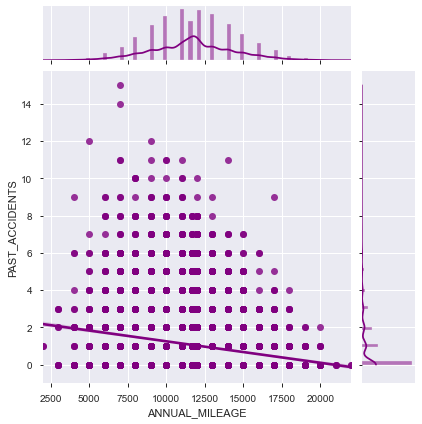

In [ ]:
plt.figure(dpi = 100, figsize = (5,4))
print("Join plot de Annual Mileage con otras variables ==> \n")
for i in  df.columns:
    if i != 'ANNUAL_MILEAGE' and (i == 'SPEEDING_VIOLATIONS' or i == 'DUIS' or i == 'PAST_ACCIDENTS'):
        print(f"Correlacion entre Past Accidents y {i} ==> ",df.corr().loc['ANNUAL_MILEAGE'][i])
        sns.jointplot(x='ANNUAL_MILEAGE',y=i,data=df,kind = 'reg',color = 'purple')
        plt.show()

Insight: Annual Mileage (Kilometraje anual) presenta una asosiación lineal debil con el resto de variables, excepto con Outcome (reclamo de seguro). 
Esto significa que al aumentar el kilometraje del auto disminuye la cantidad de accidentes por exceso de velocidad y multas, pero respecto a Outcome, presenta una correlación positiva, donde al aumentar
el kilometraje, también lo hace la cantidad de reclamos.

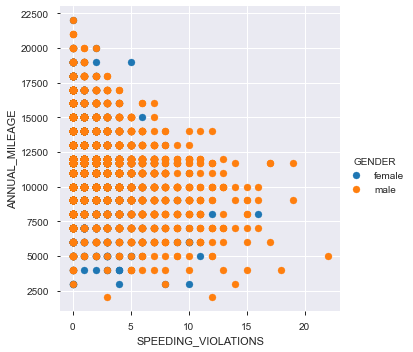

In [ ]:
sns.FacetGrid(df,hue = 'GENDER' , size = 5).map(plt.scatter,'SPEEDING_VIOLATIONS','ANNUAL_MILEAGE').add_legend();
plt.show()

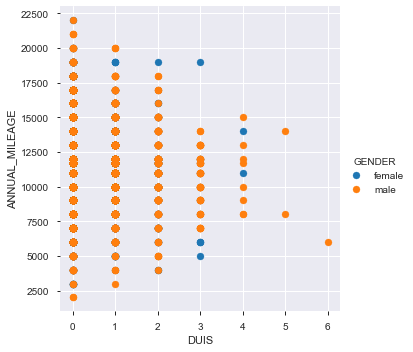

In [ ]:
sns.FacetGrid(df,hue = 'GENDER' , size = 5).map(plt.scatter,'DUIS','ANNUAL_MILEAGE').add_legend();
plt.show()

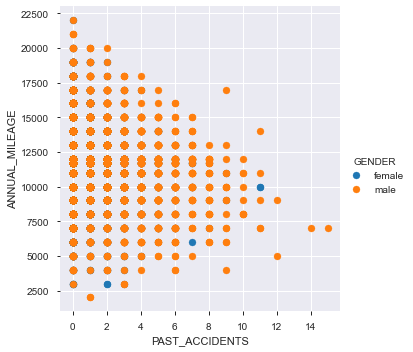

In [ ]:
sns.FacetGrid(df,hue = 'GENDER' , size = 5).map(plt.scatter,'PAST_ACCIDENTS','ANNUAL_MILEAGE').add_legend();
plt.show()

# EJECUCIÓN DE MODELOS

## Árbol de decisión

In [ ]:
#Viendo la correlación de variables decidimos no considerar las variables Postal_Code y ANNUAL_MILEAGE ya que son variables con menos correlación dentro del dataset
#Seperamos en X e y
X = data_insurance.drop(["OUTCOME","ANNUAL_MILEAGE","CREDIT_SCORE"], axis=1) #Elimino de mi dataset la variable a predecir
y = data_insurance.OUTCOME #Defino el Target


In [ ]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Tomamos 30% del dataset para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=32) 

In [ ]:
#Primer modelo a tratar será un árbol de decisión con una altura máxima de 3 debido a que contamos con 10.000 datos
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state = 32)

In [ ]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=32)

In [ ]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [ ]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión de datos de Test:')
print(matriz)

Matriz de Confusión de datos de Test:
[[1821  240]
 [ 305  634]]


### MAPA DE CALOR - MATRIZ DE CONFUSIÓN

<AxesSubplot:>

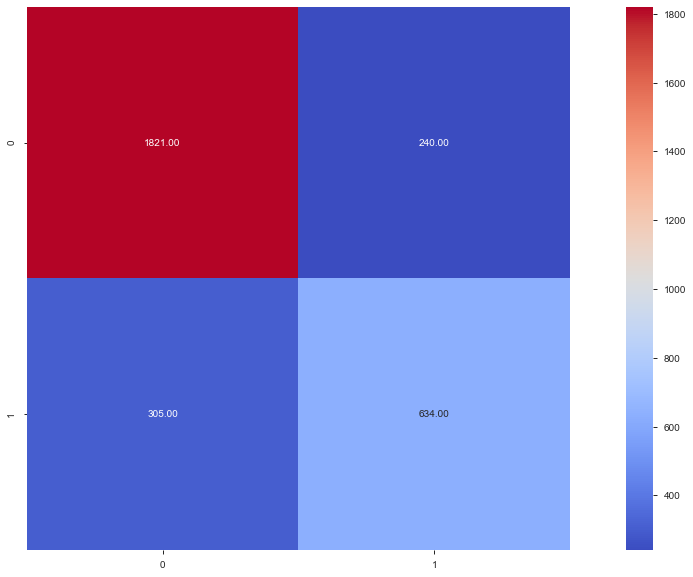

In [ ]:
#Genero el mapa de calor
sns.heatmap(matriz, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm') 

### ANÁLISIS DE RESULTADOS - CLASSIFIER TREE

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      2061
         1.0       0.73      0.68      0.70       939

    accuracy                           0.82      3000
   macro avg       0.79      0.78      0.78      3000
weighted avg       0.82      0.82      0.82      3000



Mediante las validaciones expuestas anteriormente podemos decir lo siguiente:

- Para los usuarios que no realizan un reclamo (clase 0) el modelo presenta una presición y una sensibilidad alta, por lo que decimos que performa de buena forma este modelo
- Para los usuarios que si realizan un reclamo (clase 1) el modelo presenta una baja presición y una baja sensibilidad, por lo que decimos que no logra una buena clasificación para este dataset.

En conclusión este modelo no lo consideramos apropiado para este conjunto de datos, a pesar de presentar un buen porcentaje de f-score. Esto se  debe a que nos interesa pronosticar los usuarios que si harán uso del seguro contratado.

## RANDOM FOREST

In [ ]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Separamos en train y test!
(X_train, X_test,y_train, y_test) = train_test_split(X, y, stratify=y,
                                    test_size=0.30,
                                    random_state=32)

In [ ]:
model_RF = RandomForestClassifier(random_state=32, n_estimators=100,
                               class_weight="balanced", max_features="log2")
model_RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=32)

In [ ]:
y_test_pred_ranFor = model_RF.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score  

test_accuracy = accuracy_score(y_test, y_test_pred_ranFor)

In [ ]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred_ranFor)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8186666666666667


In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred_ranFor)
print('Matriz de Confusión de datos de Test:')
print(matriz)

Matriz de Confusión de datos de Test:
[[1812  248]
 [ 296  644]]


### MAPA DE CALOR - MATRIZ DE CONFUSIÓN

<AxesSubplot:>

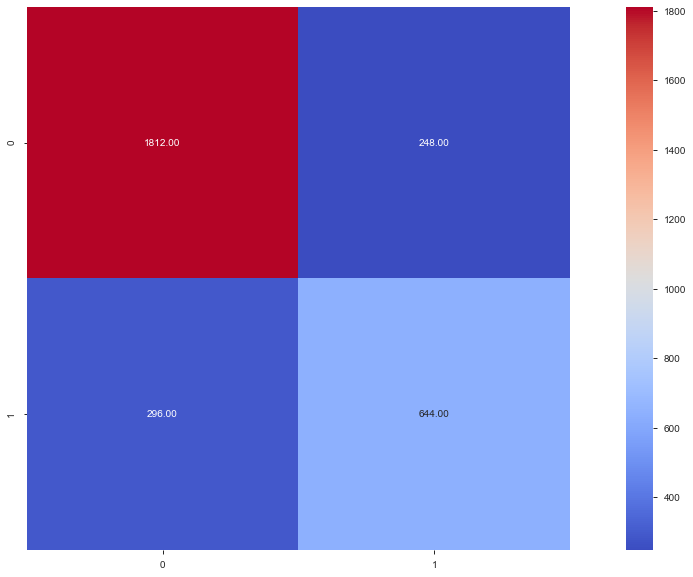

In [ ]:
#Genero el mapa de calor
sns.heatmap(matriz, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm') 

### ANÁLISIS DE RESULTADOS - RANDOM FOREST

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_ranFor))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      2060
         1.0       0.72      0.69      0.70       940

    accuracy                           0.82      3000
   macro avg       0.79      0.78      0.79      3000
weighted avg       0.82      0.82      0.82      3000



Utilizando el modelo de Random Forest podemos decir que no hubo grandes modificaciones al modelo Arbol de decisión, y que 
en conclusión este modelo tampoco lo consideramos apropiado para este conjunto de datos, a pesar de presentar un buen porcentaje de f1-score.

# BOOSTING MODELS

Sección a ejecutar modelos boost

## XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression as LR

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=32)

In [ ]:
#Entrenamiento del modelo

clf_xgb.fit(X_train,y_train)

[17:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=32,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=32,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
#Prediccion
y_train_pred_xgboost = clf_xgb.predict(X_train)
y_test_pred_xgboost = clf_xgb.predict(X_test)

### MAPA DE CALOR - MATRIZ DE CONFUSIÓN

<AxesSubplot:>

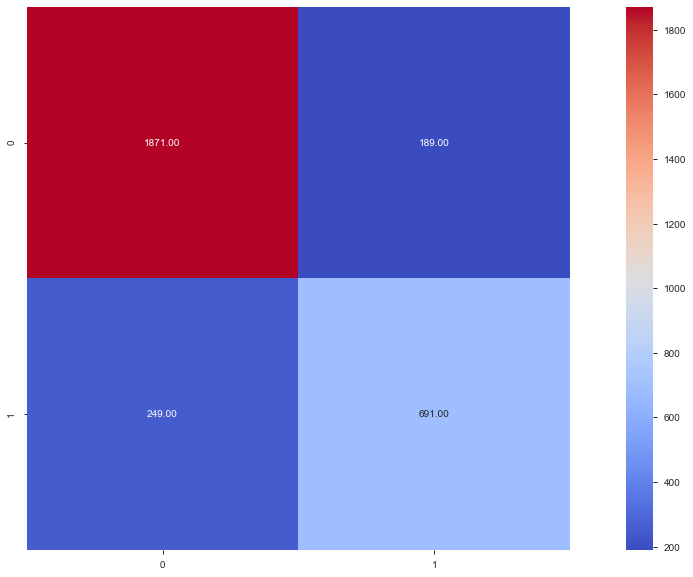

In [ ]:
matriz = confusion_matrix(y_test, y_test_pred_xgboost)
sns.heatmap(matriz, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm') 

### ANÁLISIS DE RESULTADOS - XGBOOST

In [ ]:
#Analisis de resultados
print(classification_report(y_test, y_test_pred_xgboost))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      2060
         1.0       0.79      0.74      0.76       940

    accuracy                           0.85      3000
   macro avg       0.83      0.82      0.83      3000
weighted avg       0.85      0.85      0.85      3000



Mediante las validaciones expuestas por el modelo XGBOOST podemos concluir en lo siguiente:

- Presenta una mejoría respecto a los modelos de Classifier Tree y Random Forest en cuanto a la presición de predicción, lo que consideramos aceptable al modelo de datos
- Presenta una leve mejoría de sensibilidad en cuanto a los casos de usuarios que iniciarían un reclamo del seguro contratado, pero aún así es considerado bajo para el modelo de datos utilizado.

Para finalizar decimos que este modelo es mejor en comparación a los probados anteriormente pero aún no es satisfactorio para lo que se busca predecir. 

## LIGHTGBM

In [ ]:
# Declaración - Entrenamiento del modelo
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=32)
model.fit(X_train,y_train)

LGBMClassifier(random_state=32)

In [ ]:
# Predicción del modelo
y_pred_LGB = model.predict(X_test)

### MAPA DE CALOR - MATRIZ DE CONFUSIÓN

<AxesSubplot:>

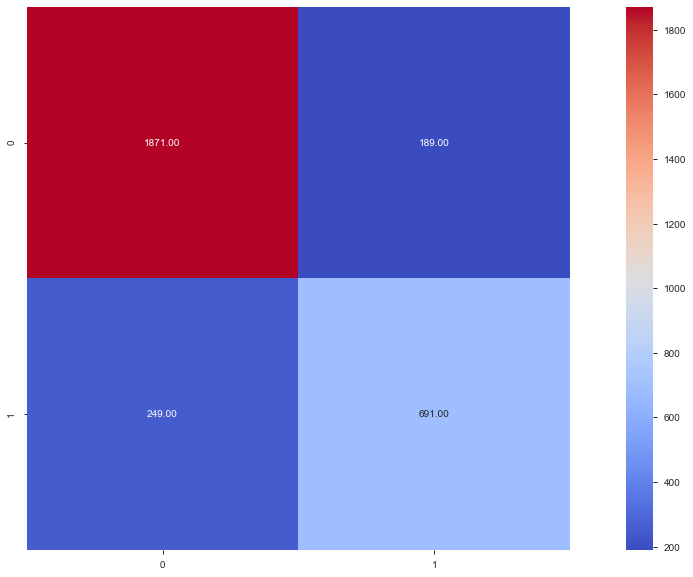

In [ ]:
matriz = confusion_matrix(y_test, y_test_pred_xgboost)
sns.heatmap(matriz, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm') 

### ANÁLISIS DE RESULTADOS - LIGHTGBM

In [ ]:
#Analisis de resultados
print(classification_report(y_test, y_test_pred_xgboost))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      2060
         1.0       0.79      0.74      0.76       940

    accuracy                           0.85      3000
   macro avg       0.83      0.82      0.83      3000
weighted avg       0.85      0.85      0.85      3000



Mediante los resultados arrojados por el modelo podemos decir lo siguiente:

- Los resultados de presición y sensibilidad son peores en comparación a los modelos probados anteriormente, dando porcentajes significativamente bajos en ambos casos.
- El rendimiento del modelo para este data set, en cuanto a la población que haría reclamos es de un 28% y tiene una exactitud de predicción (respecto a la muestra de 3000) muy mala con un porcentaje del 57%

Concluimos que este modelo de predicción no es aceptable para este data set.

## CATBOOST

In [ ]:
# Definición - Entrenamiento de modelo
from catboost import CatBoostClassifier
modelo = CatBoostClassifier()
modelo.fit(X_train, y_train)

Learning rate set to 0.023648
0:	learn: 0.6699784	total: 144ms	remaining: 2m 23s
1:	learn: 0.6456252	total: 163ms	remaining: 1m 21s
2:	learn: 0.6266479	total: 166ms	remaining: 55.1s
3:	learn: 0.6113372	total: 183ms	remaining: 45.5s
4:	learn: 0.5960017	total: 185ms	remaining: 36.9s
5:	learn: 0.5789458	total: 188ms	remaining: 31.1s
6:	learn: 0.5660936	total: 190ms	remaining: 27s
7:	learn: 0.5537396	total: 198ms	remaining: 24.5s
8:	learn: 0.5423503	total: 213ms	remaining: 23.5s
9:	learn: 0.5320368	total: 229ms	remaining: 22.6s
10:	learn: 0.5196471	total: 231ms	remaining: 20.8s
11:	learn: 0.5084827	total: 234ms	remaining: 19.3s
12:	learn: 0.4982789	total: 237ms	remaining: 18s
13:	learn: 0.4914695	total: 240ms	remaining: 16.9s
14:	learn: 0.4818781	total: 244ms	remaining: 16s
15:	learn: 0.4720856	total: 259ms	remaining: 16s
16:	learn: 0.4654380	total: 275ms	remaining: 15.9s
17:	learn: 0.4569213	total: 278ms	remaining: 15.1s
18:	learn: 0.4512624	total: 280ms	remaining: 14.5s
19:	learn: 0.4458

In [ ]:
# Predicción del modelo
expected_y  = y_test
y_test_catboost = modelo.predict(X_test)

<AxesSubplot:>

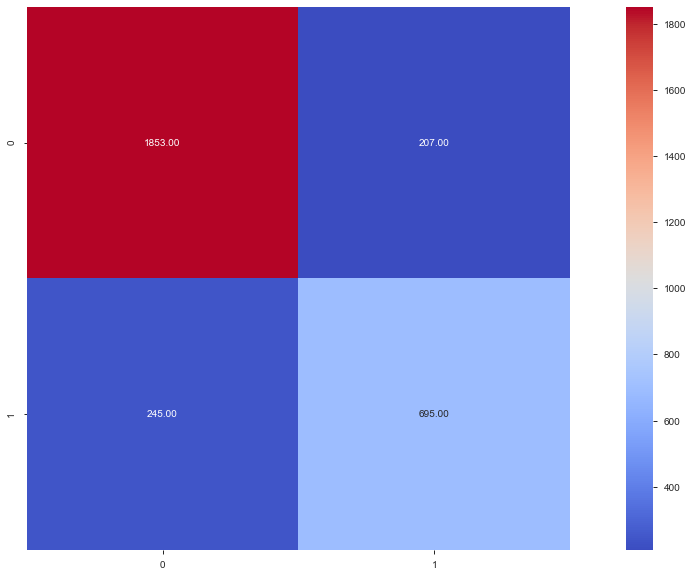

In [ ]:
matriz = confusion_matrix(y_test, y_test_catboost)
sns.heatmap(matriz, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm') 

### ANÁLISIS DE RESULTAODS - CATBOOST

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("R2_Score:")
print(r2_score(expected_y, y_test_catboost))
print("")
print("Mean_Squared_Error:")
print(mean_squared_error(expected_y, y_test_catboost))


R2_Score:
0.29973146044205745

Mean_Squared_Error:
0.15066666666666667


<AxesSubplot:xlabel='OUTCOME'>

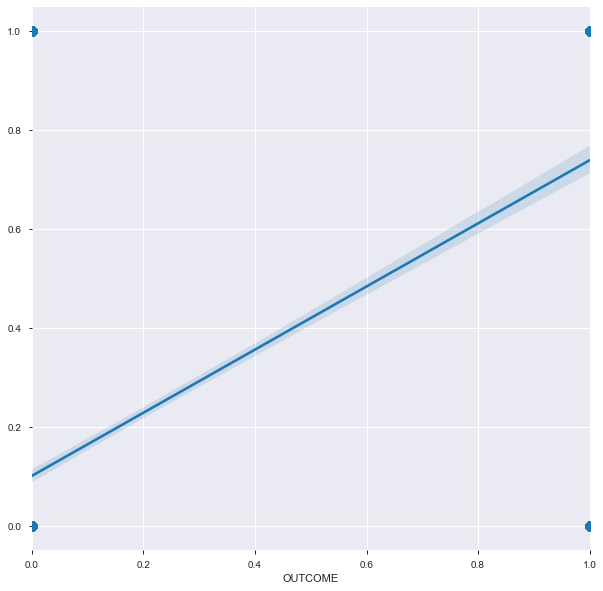

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, y_test_catboost, fit_reg=True, scatter_kws={"s": 100})

In [ ]:
print(classification_report(y_test, y_test_catboost))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2060
         1.0       0.77      0.74      0.75       940

    accuracy                           0.85      3000
   macro avg       0.83      0.82      0.82      3000
weighted avg       0.85      0.85      0.85      3000



Con los resultados arrojados podemos decir lo siguiente:

- La sensibilidad de los valores se asemeja a los resultados del modelo XGBoost en cuanto a los usuarios que harían el reclamo del seguro.
- La exactitud de predicción del modelo también se asemeja al XGBoost

Concluimos en que tanto este modelo de CatBoost es comparable al XGBoost, que al tener resultados de predicción similares para este modelo de datos, lo que los vuelve poco satisfactorios.

# Mejora del modélo

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


## Mejora del modelo Decision Tree Classifier

In [ ]:
param_grid = { 'criterion':['gini', 'entropy'],
                'splitter':['best','random']
}
gS_dTree = GridSearchCV(tree, param_grid=param_grid, cv=5)

In [ ]:
gS_dTree.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=32),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [ ]:
print("Mejores parametros: "+str(gS_dTree.best_params_))
print("Mejor Score: "+str(gS_dTree.best_score_)+'\n')

Mejores parametros: {'criterion': 'gini', 'splitter': 'best'}
Mejor Score: 0.8171428571428571



In [ ]:
scores_DTree = pd.DataFrame(gS_dTree.cv_results_)
scores_DTree

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007001,6.330132e-04,0.001001,1.907349e-07,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.840714,0.808571,0.806429,0.815,0.815,0.817143,0.012272,1
1,0.005801,4.000427e-04,0.001401,4.899404e-04,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.840714,0.808571,0.806429,0.815,0.815,0.817143,0.012272,1
2,0.006601,4.898040e-04,0.001201,3.999949e-04,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.840714,0.808571,0.806429,0.815,0.815,0.817143,0.012272,1
3,0.006001,3.504023e-07,0.001401,4.897067e-04,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.840714,0.808571,0.806429,0.815,0.815,0.817143,0.012272,1


In [ ]:
prediction_dtree = gS_dTree.predict(X_test)

In [ ]:
matriz_gridsearch_dt = confusion_matrix(y_test, prediction_dtree)
print('Matriz de Confusión de datos de Test:')
print(matriz_gridsearch_dt)

Matriz de Confusión de datos de Test:
[[1834  226]
 [ 302  638]]


<AxesSubplot:>

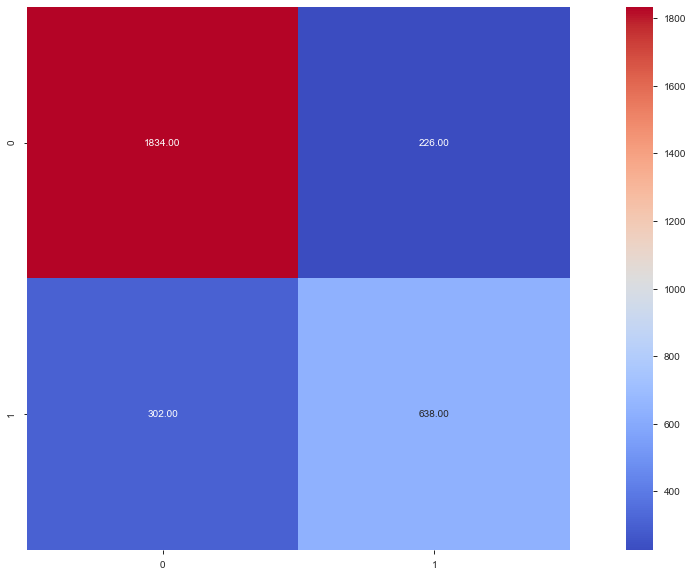

In [ ]:
sns.heatmap(matriz_gridsearch_dt, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm') 

In [ ]:
print('Exactitud Decision Tree Classifier:', accuracy_score(y_test, y_test_pred))
print('Exactitud Decision Tree Classifier + GridSearch:', accuracy_score(y_test, prediction_dtree))

Exactitud Decision Tree Classifier: 0.59
Exactitud Decision Tree Classifier + GridSearch: 0.824


In [ ]:
from sklearn.metrics import precision_score

print('Precisión para Decision tree classifier: ', precision_score(y_test, y_test_pred, average='macro'))
print('Precisión para Decision tree classifier + GridSearch: ', precision_score(y_test, prediction_dtree, average='macro'))

Precisión para Decision tree classifier:  0.5146491838004352
Precisión para Decision tree classifier + GridSearch:  0.798520079067832


### Se comparan las matrices de confusión del modelo "Desicion Tree Classifier" vs el modelo mejorado y se destaca lo siguiente:
 - La mejora del modelo utilizado es significativa ya que tanto la precisión como la exactitud tienen mayor valor en el modelo mejorado con los hiperparámetros. Como solución a nuestra problemática podríamos acercarnos más a la estimación de que un asegurado realice un reclamo de su seguro.

## Mejora del modelo Random Forest


In [ ]:
param_grid = { 'criterion':['gini', 'entropy'],
                'max_features':['auto','sqrt', 'log2'],
                'class_weight':['balanced', 'balanced_subsample']
}
gS_RF = GridSearchCV(model_RF, param_grid=param_grid, cv=5)

In [ ]:
gS_RF.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_features='log2',
                                              random_state=32),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [ ]:
print("Mejores parametros: "+str(gS_RF.best_params_))
print("Mejor Score: "+str(gS_RF.best_score_)+'\n')

Mejores parametros: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto'}
Mejor Score: 0.8212857142857143



In [ ]:
scores_RT = pd.DataFrame(gS_RF.cv_results_)
scores_RT

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.352483,0.032377,0.025406,0.000490,balanced,gini,auto,"{'class_weight': 'balanced', 'criterion': 'gin...",0.822857,0.827143,0.810000,0.810000,0.825714,0.819143,0.007592,7
1,0.338291,0.002813,0.025206,0.000400,balanced,gini,sqrt,"{'class_weight': 'balanced', 'criterion': 'gin...",0.822857,0.827143,0.810000,0.810000,0.825714,0.819143,0.007592,7
2,0.320672,0.002578,0.025406,0.000490,balanced,gini,log2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.825714,0.824286,0.807857,0.813571,0.826429,0.819571,0.007486,5
3,0.361281,0.003311,0.025406,0.000490,balanced,entropy,auto,"{'class_weight': 'balanced', 'criterion': 'ent...",0.829286,0.828571,0.808571,0.814286,0.825714,0.821286,0.008335,1
4,0.355880,0.001167,0.025405,0.000490,balanced,entropy,sqrt,"{'class_weight': 'balanced', 'criterion': 'ent...",0.829286,0.828571,0.808571,0.814286,0.825714,0.821286,0.008335,1
5,0.333875,0.001470,0.025606,0.000490,balanced,entropy,log2,"{'class_weight': 'balanced', 'criterion': 'ent...",0.820000,0.820000,0.807857,0.813571,0.827857,0.817857,0.006746,11
6,0.446716,0.005925,0.025222,0.000393,balanced_subsample,gini,auto,"{'class_weight': 'balanced_subsample', 'criter...",0.826429,0.825000,0.815000,0.814286,0.823571,0.820857,0.005159,3
7,0.444791,0.003915,0.026598,0.001621,balanced_subsample,gini,sqrt,"{'class_weight': 'balanced_subsample', 'criter...",0.826429,0.825000,0.815000,0.814286,0.823571,0.820857,0.005159,3
8,0.422966,0.005625,0.026212,0.002543,balanced_subsample,gini,log2,"{'class_weight': 'balanced_subsample', 'criter...",0.825000,0.820000,0.805000,0.815000,0.831429,0.819286,0.008978,6
9,0.464883,0.008804,0.024371,0.006985,balanced_subsample,entropy,auto,"{'class_weight': 'balanced_subsample', 'criter...",0.821429,0.823571,0.810000,0.811429,0.827143,0.818714,0.006797,9


In [ ]:
prediction_rf = gS_RF.predict(X_test)

In [ ]:
matriz_gridsearch_rf = confusion_matrix(y_test, prediction_rf)
print('Matriz de Confusión de datos de Test:')
print(matriz_gridsearch_rf)

Matriz de Confusión de datos de Test:
[[1805  255]
 [ 288  652]]


<AxesSubplot:>

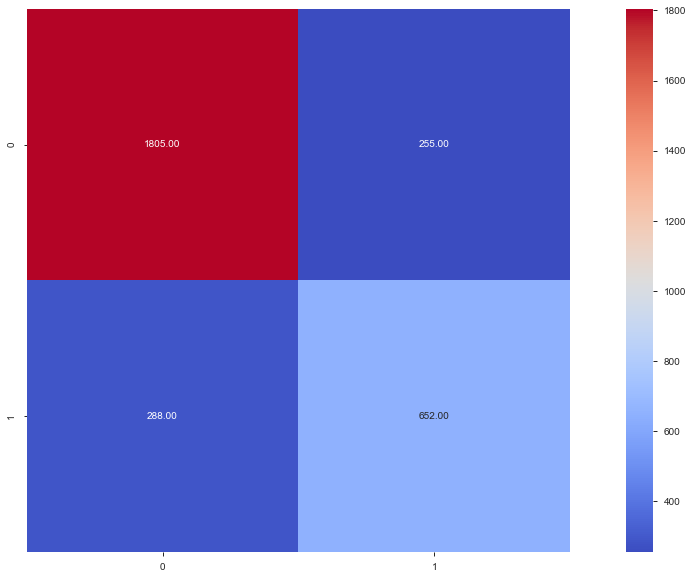

In [ ]:
sns.heatmap(matriz_gridsearch_rf, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm') 

In [ ]:
print('Exactitud Random Forest Classifier:', accuracy_score(y_test, y_test_pred_ranFor))
print('Exactitud Random Forest Classifier + GridSearch:', accuracy_score(y_test, prediction_rf))

Exactitud Random Forest Classifier: 0.8186666666666667
Exactitud Random Forest Classifier + GridSearch: 0.819


In [ ]:
print('Precisión para Random Forest Classifier: ', precision_score(y_test, y_test_pred_ranFor, average='macro'))
print('Precisión para Random Forest Classifier + GridSearch: ', precision_score(y_test, prediction_rf, average='macro'))

Precisión para Random Forest Classifier:  0.7907778184324503
Precisión para Random Forest Classifier + GridSearch:  0.790625916914206


Analisis del modelo "Random Forest Classifier" vs el mismo modelo mejorado por hiperparámetro con GridSearch

- Luego de analizar la precisión y la exactitud entre ambos modelos llegamos a la conclusión de que no hay una mejora significativa mejorandolo con la utilización de hiperparámetros mediante GridSearch